# Exploratory Data Analysis of Movielens Dataset

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Analysis - Movies.csv

In [185]:
df_movies = pd.read_csv("assets/movies.csv")

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Extracting year from title

### Using regex to remove year from all titles

In [186]:
# get year values from title
year = df_movies.title.str.extract("\((\d{4})\)").replace(np.nan, "0").astype("int64")

# add year to separate column in dataframe
df_movies["year"] = year

# remove year from title
df_movies["title"] = df_movies["title"].str.replace("\d+", '', regex = True).str.replace(r"\(.*\)","", regex = True)

df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


### Looking at dtype and value count

In [187]:
df_movies.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
 3   year     58098 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


### Looking at values

In [188]:
df_movies.describe() # NOTE: movies without year was added as 0, could be replaced with nan if needed

,movieId,year
count,58098.000000,58098.000000
mean,111919.516197,1980.190816
std,59862.660956,151.043382
min,1.000000,0.000000
25%,72437.750000,1975.000000
50%,126549.000000,2001.000000
75%,161449.500000,2011.000000
max,193886.000000,2018.000000


# Initial Analysis - Ratings.csv

In [189]:
df_ratings = pd.read_csv("assets/ratings.csv")

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


## Converting epoch to datetime format

In [190]:
df_ratings["timestamp"] = pd.to_datetime(df_ratings["timestamp"], unit = 's')

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,2009-10-27 21:00:21
1,1,481,3.5,2009-10-27 21:04:16
2,1,1091,1.5,2009-10-27 21:04:31
3,1,1257,4.5,2009-10-27 21:04:20
4,1,1449,4.5,2009-10-27 21:01:04


### Looking at earliest and latest rating

In [191]:
earliest = df_ratings["timestamp"].min()
latest = df_ratings["timestamp"].max()

print(f"Dataset contains rating data from {earliest.year} to {latest.year}")

Dataset contains rating data from 1995 to 2018


### Looking at dtype and value count

In [192]:
df_ratings.info(show_counts = True) # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype         
---  ------     --------------     -----         
 0   userId     27753444 non-null  int64         
 1   movieId    27753444 non-null  int64         
 2   rating     27753444 non-null  float64       
 3   timestamp  27753444 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 847.0 MB


### Looking at values

In [193]:
df_ratings.describe()

,userId,movieId,rating
count,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00
std,8.170740e+04,3.510263e+04,1.066353e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,7.117600e+04,1.097000e+03,3.000000e+00
50%,1.420220e+05,2.716000e+03,3.500000e+00
75%,2.124590e+05,7.150000e+03,4.000000e+00
max,2.832280e+05,1.938860e+05,5.000000e+00


In [194]:
df_ratings["rating"].mean() # average rating

3.5304452124932677

In [195]:
df_ratings["rating"].median() # average rating given by users

3.5

# Rating Distribution

### Bar plot showing value count for each individual rating

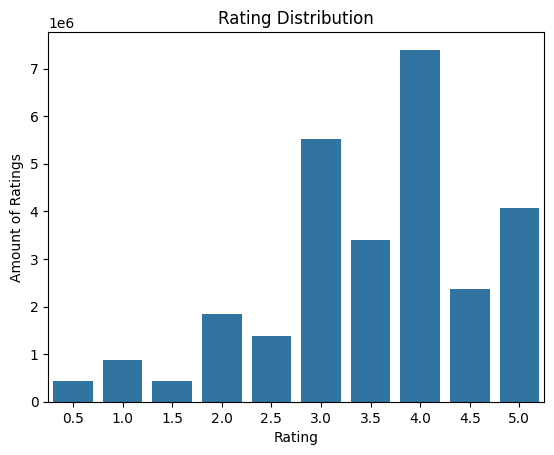

In [196]:
rating_counts = df_ratings["rating"].value_counts()

ax = sns.barplot(x = rating_counts.index, y = rating_counts.values, color = "C0")
ax.set(title = "Rating Distribution", xlabel = "Rating", ylabel = "Amount of Ratings");

### Box plot showing overall rating distribution

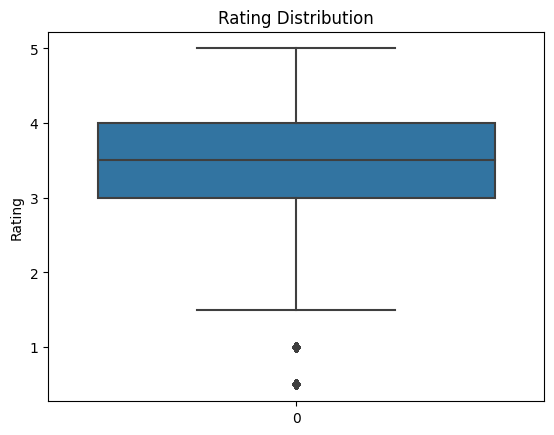

In [197]:
ax = sns.boxplot(df_ratings["rating"]);
ax.set(title = "Rating Distribution", ylabel = "Rating");